## **Test only - using models already built**

# Part 3: Writing your own Episode of House MD - 30%
![](https://upload.wikimedia.org/wikipedia/en/thumb/b/ba/HouseMD-s1-UK-DVD.jpg/250px-HouseMD-s1-UK-DVD.jpg)
![](https://upload.wikimedia.org/wikipedia/en/d/da/HouseMD-s4-US-DVD.jpg)
![](https://upload.wikimedia.org/wikipedia/en/1/16/House_S6_DVD.jpg)

# Predict a bit of dialogue from the 3 characters 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import string
import tensorflow as tf
import time
import random
import pickle

# 3 Characters

## Dr Gregory House,  Eric Foreman, Dr Robert Chase     

![Dr Gregory House](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-yTMBZLLJzFq5ooocwZV6SFfHzhgL8opm5A&usqp=CAU)
![Eric Foreman](https://www.mafiascum.net/images/img-tags/Ds9Ua7RE9pzFq2Zq9Qtv.jpg)
![Dr Robert Chase](http://images2.fanpop.com/images/soapbox/house-md_20587_top.jpg?cache=1246542869)



In [8]:
characters = ['House', 'Foreman', 'Chase']

# load the tokenizer to convert from ints to strings

In [9]:
path_to_downloaded_tokenizer = tf.keras.utils.get_file("house_tokenizer.pickle",
    "https://gitlab.com/dogmountain/deep_learning_lyrics/-/raw/master/house_tokenizer.pickle")
with open(path_to_downloaded_tokenizer, 'rb') as f:
    tokenizer = pickle.load(f)
total_words = len(tokenizer.word_index) + 1
print("total words", total_words)

total words 60047


# Generate Text:

In [55]:
def bar_chart(**arrs):
    """used below to illustrate how the sampling is done with different temperatures"""
    n = len(arrs)
    plt.figure(figsize=(20, 3))
    for i, (name, arr) in enumerate(arrs.items()):
        plt.subplot(1, n, i + 1)
        plt.title(' '.join(name.split('_')).title())
        plt.bar(x=list(range(len(arr))), height=arr)
    plt.show()

In [58]:
def sample_next(predictions, temperature=1.0):
    """borrowed kindly from a book:
    Chollet, F. (2021). Deep Learning with Python, Second Edition.
    page 373
    This function will take an array of softmax probabilities
    """
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, predictions, 1)
    return np.argmax(probas)

### a little code here to understand how the the sampling is done 

temperature: 0.9


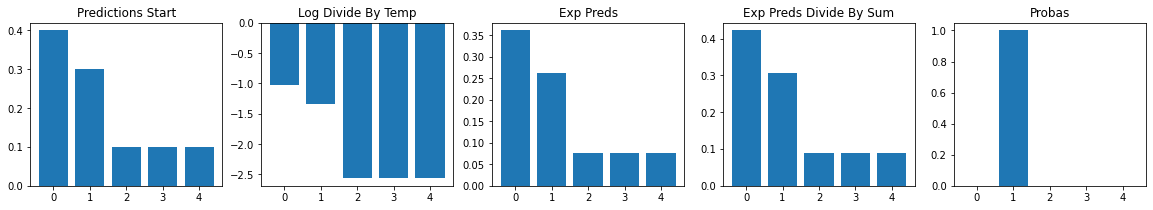

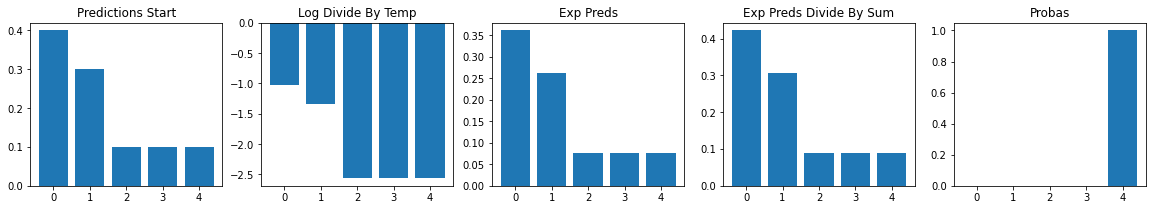

temperature: 0.1


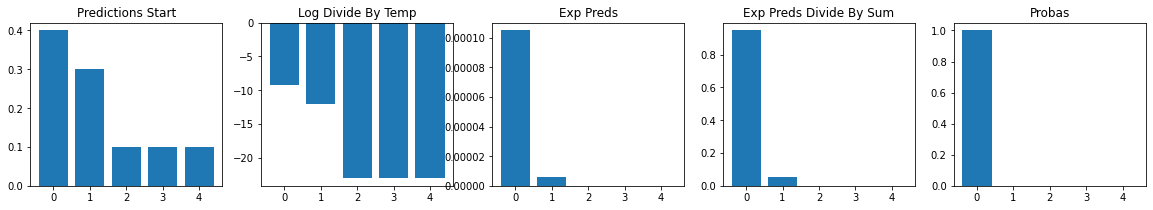

In [111]:
predictions = np.array([0.4, 0.3,0.1,0.1,0.1])
temperature = 0.9
print(f'temperature: {temperature}')
bar_chart(
    predictions_start=predictions,
    log_divide_by_temp=(np.log(predictions) / temperature),
    exp_preds=np.exp((np.log(predictions) / temperature)),
    exp_preds_divide_by_sum = (np.exp((np.log(predictions) / temperature)) / np.sum(np.exp((np.log(predictions) / temperature)))),
    probas=np.random.multinomial(1, (np.exp((np.log(predictions) / temperature)) / np.sum(np.exp((np.log(predictions) / temperature)))), 1)[0]
)
bar_chart(
    predictions_start=predictions,
    log_divide_by_temp=(np.log(predictions) / temperature),
    exp_preds=np.exp((np.log(predictions) / temperature)),
    exp_preds_divide_by_sum = (np.exp((np.log(predictions) / temperature)) / np.sum(np.exp((np.log(predictions) / temperature)))),
    probas=np.random.multinomial(1, (np.exp((np.log(predictions) / temperature)) / np.sum(np.exp((np.log(predictions) / temperature)))), 1)[0]
)
temperature = 0.1
print(f'temperature: {temperature}')
bar_chart(
    predictions_start=predictions,
    log_divide_by_temp=(np.log(predictions) / temperature),
    exp_preds=np.exp((np.log(predictions) / temperature)),
    exp_preds_divide_by_sum = (np.exp((np.log(predictions) / temperature)) / np.sum(np.exp((np.log(predictions) / temperature)))),
    probas=np.random.multinomial(1, (np.exp((np.log(predictions) / temperature)) / np.sum(np.exp((np.log(predictions) / temperature)))), 1)[0]
)

In [112]:
temperature = 0.2
max_turns=10

In [114]:
character_models = []
for character in characters:
    remote_url = 'https://gitlab.com/dogmountain/deep_learning_lyrics/-/raw/master/best_model_{}.h5'.format(character)
    local_file = "best_model_{}.h5".format(character)
    path_to_downloaded_model = tf.keras.utils.get_file(local_file,remote_url)
    model = tf.keras.models.load_model(path_to_downloaded_model)
    character_models.append(model)

print("")
print("*"*60)
print("*** House Generated dialogue ***")
print("*"*60)
print("")
# 69 words with a count higher than 2000, we will use them as seeds for the line
starters = [k for k,v in tokenizer.word_counts.items() if v> 2000]
turns = 0
while turns < max_turns:
    turns += 1
    curr_char_index = random.choices([0,1,2], weights=[0.5, 0.25, 0.25])[0] # going to give House most lines
    next_words = 100
    seed_text = random.choice(starters)
    for next_gen_num in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])
        token_list = tf.keras.preprocessing.sequence.pad_sequences(token_list, maxlen=19, padding='pre')
        predicted = character_models[curr_char_index].predict(token_list)
        # index = np.argmax(predicted, axis=1) # I could just take the top probability each time
        index = [sample_next(predicted[0,:], temperature=temperature)]
        word = tokenizer.sequences_to_texts([index])
        seed_text += " " + word[0]
        if next_gen_num > 50 and seed_text.endswith("."):
            break

    print(characters[curr_char_index].upper(),":", seed_text)
    print("")
    print("*"*60)


************************************************************
*** House Generated dialogue ***
************************************************************



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


HOUSE : about the file is not a consolation prize.
 by the other time. he starts to write, 
 
 
 and places on the couch) 
 was a federal cheap you have a better thing to the patient with the brain is the only thing the life with natural carry in the sidewalk.
 which is no problem.

************************************************************
HOUSE : are you going to do a problem with you. i don't have a good one. i think you were a complex good of the last time to get a response?
 in the meantime, the prolonged interruption and the only thing is the ones that the dragged on the kitchen, you don't want to be a burden.
 if you have a bacterium.

************************************************************
HOUSE : she's not a sociopath.
 in the other hand, i have to get out of the street of the identically clad cheerleaders surrounding the dad to get the phone and starts to leave. 
 
 and you can get to the other hand, i don't have to be conceived.
 to the end.
 you have a little a littl